In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\hchintada\Downloads')
data = pd.read_csv('pastry.csv')

In [69]:
data.head()

,Rating,Moisture,Sweetness
0,64,4,2
1,73,4,4
2,61,4,2
3,76,4,4
4,72,6,2


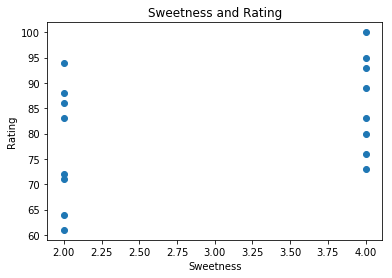

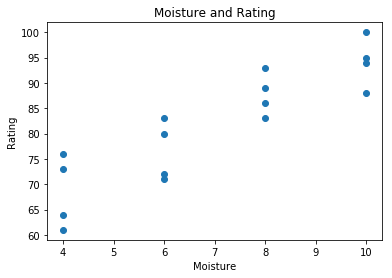

In [71]:
#plotting each of the predictors with the Y
plt.xlabel('Sweetness')
plt.ylabel('Rating')
plt.title('Sweetness and Rating')
plt.scatter(data['Sweetness'],data['Rating'])
plt.show()
plt.xlabel('Moisture')
plt.ylabel('Rating')
plt.title('Moisture and Rating')
plt.scatter(data['Moisture'],data['Rating'])
plt.show()

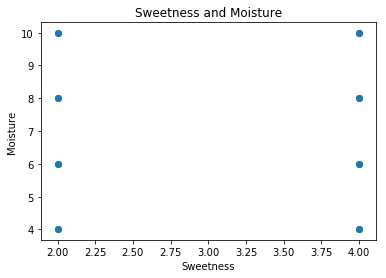

In [72]:
#Plotting impact within the predictors
plt.xlabel('Sweetness')
plt.ylabel('Moisture')
plt.title('Sweetness and Moisture')
plt.scatter(data['Sweetness'],data['Moisture'])
plt.show()

In [79]:
#SLR with Sweetness and Rating
import statsmodels.api as sm
X1 = data['Sweetness']
X1 = sm.add_constant(X1) #we need to add this line (which adds a constant to the df) to get an intercept.
y = data['Rating']
sweet_reg = sm.OLS(y,X1)


In [80]:
#Viewing the sweet_rating model results
sweet_results = sweet_reg.fit()
print(sweet_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2.582
Date:                Tue, 06 Mar 2018   Prob (F-statistic):              0.130
Time:                        18:06:18   Log-Likelihood:                -59.843
No. Observations:                  16   AIC:                             123.7
Df Residuals:                      14   BIC:                             125.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.6250      8.610      7.970      0.0

C:\Users\hchintada\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [81]:
#SLR with Moisture and Rating
import statsmodels.api as sm
X2 = data['Moisture']
X2 = sm.add_constant(X2)
moist_reg = sm.OLS(y,X2)

In [82]:
#Viewing the sweet_rating model results
moist_results = moist_reg.fit()
print(moist_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     54.75
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           3.36e-06
Time:                        18:07:54   Log-Likelihood:                -48.465
No. Observations:                  16   AIC:                             100.9
Df Residuals:                      14   BIC:                             102.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.7750      4.395     11.554      0.0

C:\Users\hchintada\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [74]:
#Building the model with all Xs
X = data.drop(['Rating'],axis=1,inplace = False)
X = sm.add_constant(X)
model = sm.OLS(y,X)

In [75]:
#Viewing the model results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     129.1
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           2.66e-09
Time:                        17:55:48   Log-Likelihood:                -36.894
No. Observations:                  16   AIC:                             79.79
Df Residuals:                      13   BIC:                             82.11
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.6500      2.996     12.566      0.0

C:\Users\hchintada\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [85]:
#zero correlation between sweetness and moisture
data.corr()

,Rating,Moisture,Sweetness
Rating,1.000000,0.892393,0.394581
Moisture,0.892393,1.000000,0.000000
Sweetness,0.394581,0.000000,1.000000


# Dataset with partial correlation

In [87]:
data1 = pd.read_csv('female_stats.csv')
data1.head()

,Height,momheight,dadheight
0,66.0,66.0,71.0
1,64.0,62.0,68.0
2,64.0,65.0,70.0
3,69.0,66.0,76.0
4,66.0,63.0,70.0


The variables are y = student’s self-reported height, x1 = student’s guess at her mother’s height, and x2 = student’s guess at her father’s height.

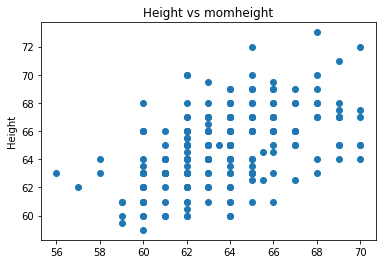

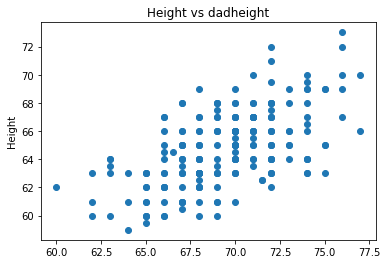

In [94]:
#plotting the variables
plt.title('Height vs momheight')
plt.ylabel('Height')
plt.scatter('momheight','Height',data=data1)
plt.show()
plt.title('Height vs dadheight')
plt.ylabel('Height')
plt.scatter('dadheight','Height',data=data1)
plt.show()

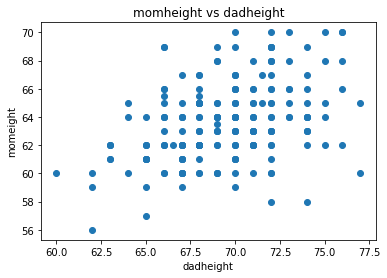

In [100]:
plt.title('momheight vs dadheight')
plt.xlabel('dadheight')
plt.ylabel('momeight')
plt.scatter('dadheight','momheight',data=data1)
plt.show()

In [102]:
print(data1.corr())

             Height  momheight  dadheight
Height     1.000000   0.502272   0.591721
momheight  0.502272   1.000000   0.402028
dadheight  0.591721   0.402028   1.000000


In [105]:
#SLR with momheight and Height
X1 = data1['momheight']
X1 = sm.add_constant(X1) #we need to add this line (which adds a constant to the df) to get an intercept.
y = data1['Height']
mom_reg = sm.OLS(y,X1)
results = mom_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     71.53
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           4.45e-15
Time:                        18:46:05   Log-Likelihood:                -483.48
No. Observations:                 214   AIC:                             971.0
Df Residuals:                     212   BIC:                             977.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.0223      3.641      9.345      0.0

In [106]:
#SLR with dadheight and Height
X1 = data1['dadheight']
X1 = sm.add_constant(X1) #we need to add this line (which adds a constant to the df) to get an intercept.
y = data1['Height']
dad_reg = sm.OLS(y,X1)
results = dad_reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     114.2
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           1.32e-21
Time:                        18:47:20   Log-Likelihood:                -468.47
No. Observations:                 214   AIC:                             940.9
Df Residuals:                     212   BIC:                             947.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5190      3.209      9.509      0.0

In [112]:
#Building the model with all Xs
predictors = data1.drop(['Height'],axis=1,inplace = False)
predictors = sm.add_constant(predictors)
label = data1['Height']
height_model = sm.OLS(label,predictors)
results = height_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     80.73
Date:                Tue, 06 Mar 2018   Prob (F-statistic):           9.16e-27
Time:                        18:58:51   Log-Likelihood:                -453.78
No. Observations:                 214   AIC:                             913.6
Df Residuals:                     211   BIC:                             923.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5473      3.693      5.023      0.0

In [97]:
data1.corr()

,Height,momheight,dadheight
Height,1.000000,0.502272,0.591721
momheight,0.502272,1.000000,0.402028
dadheight,0.591721,0.402028,1.000000


# Partial regresson plots

In a partial regression plot, to discern the relationship between the response variable and the  k -th variabe, we compute 
the residuals by regressing the response variable versus the independent variables excluding  Xk . We can denote this by 
X∼k . We then compute the residuals by regressing  Xk  on  X∼k . The partial regression plot is the plot 
of the former versus the latter residuals. 

The notable points of this plot are that the fitted line has slope  βk  and intercept zero. The residuals of this plot 
are the same as those of the least squares fit of the original model with full  X . You can discern the effects of the 
individual data values on the estimation of a coefficient easily. You can also see the violation of underlying assumptions such as homooskedasticity and 
linearity.

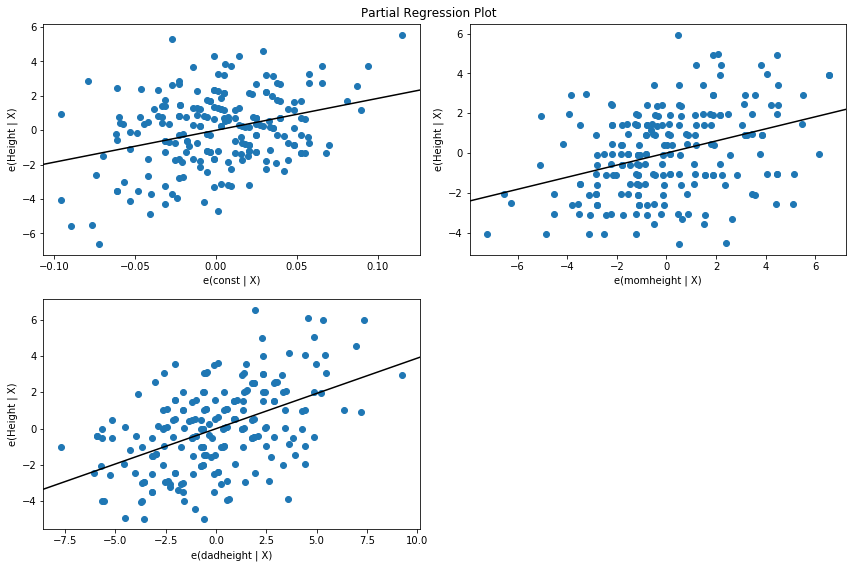

In [116]:
#Partial regressor plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)